In [1]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

Use monthly vehicle distribution to predict emissions

**Load data**

In [2]:
# CA hourly CO2 emissions and demand

df = pd.read_csv('data/monthly_all_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (96, 13)


,Unnamed: 0.1,date,demand,emissions,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane
0,9,202112,11489598.82,4959996.71,522436,305309,10117,590218,1208964,25998612,1298265,8456,93
1,10,202111,10731961.28,4365100.13,509680,301459,9868,599397,1203595,25917176,1286366,8391,160
2,11,202110,12062383.69,4577134.35,496924,297609,9619,608576,1198226,25835740,1274467,8326,227
3,12,202109,13537589.39,5070292.57,484168,293759,9370,617755,1192857,25754304,1262568,8261,294
4,13,202108,15754584.69,5607233.68,471412,289909,9121,626934,1187488,25672868,1250669,8196,361


**Correlation**

<AxesSubplot: >

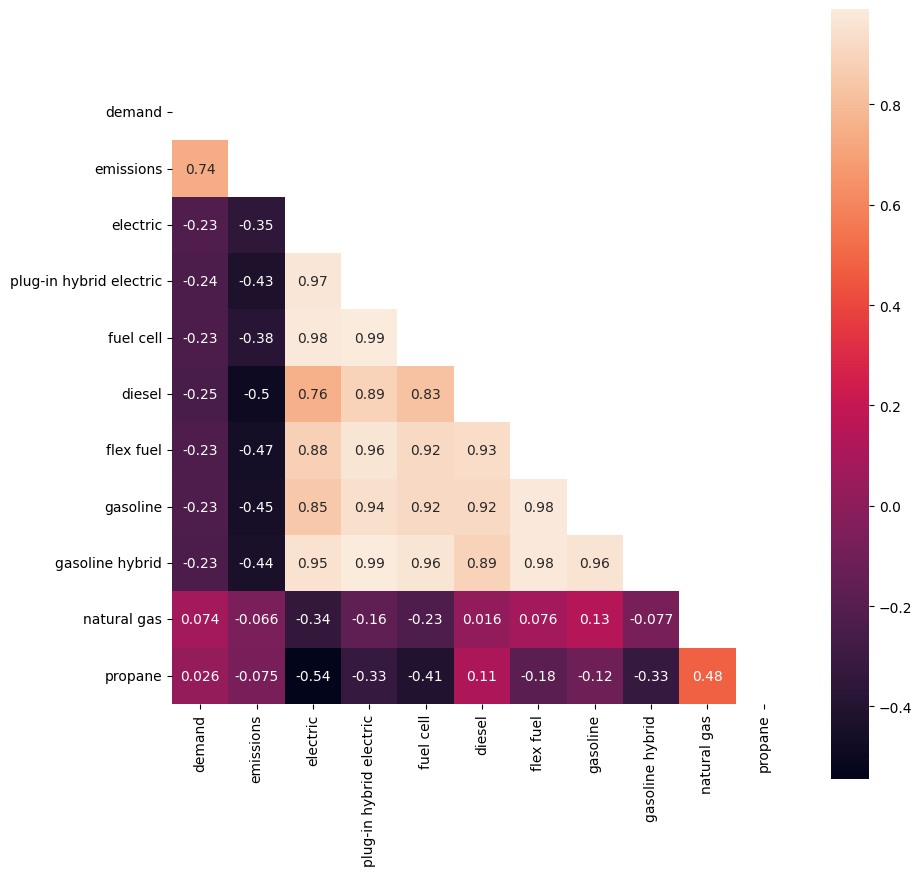

In [3]:
df = df.drop(['date','Unnamed: 0.1'], axis=1)
correlation = df.corr(method = 'pearson')
plt.subplots(figsize = (10,10))
masked = np.triu(np.ones_like(correlation, dtype=bool)) 
sns.heatmap(correlation,mask=masked,square = True, annot = True)

**Model**

In [5]:
df = df.astype({'emissions':'int'})

X = df.drop(["emissions","demand"], axis=1)
y = df["emissions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

distribution = {
         'n_estimators': [5,10,20,30,50,100,200] ,  
         'max_features': ['log2','auto', 'sqrt'],
         'max_depth': [3,5,7,9,12] ,
         'min_samples_split': [2,4,6,8,10,15,20,30] ,
         'min_samples_leaf': [1,3,4,6,10,15,17],
       }

forest = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator = forest, param_distributions = distribution, n_iter = 60)                
random_rf.fit(X_train,  y_train)

print(f'model score on training data : {random_rf.score(X_train,  y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


model score on training data : 0.9200510529963659
model score on testing data: 0.640338728127767


Test case

In [258]:
random_rf.predict([[522436,305309,10117,590218,1208964,25998612,1298265,8456,93]])

array([4861503.495])